In [2]:
library(tidyverse)
library(cowplot)
library(here)
options(here.quiet = TRUE)

In [3]:
df <-read.delim("../data/baseline_follow_up_361_visit_clinical.txt")

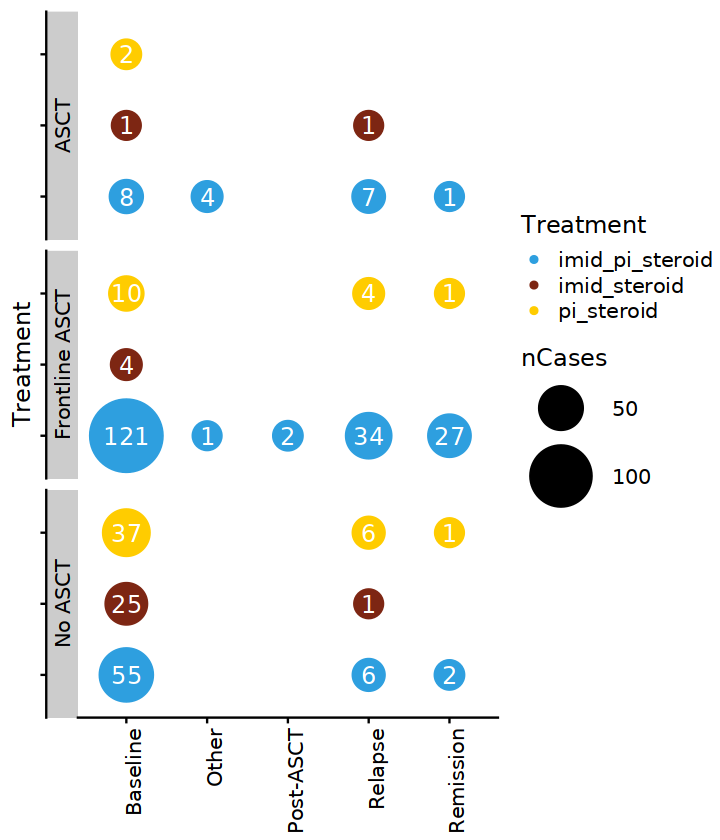

In [4]:
# Set plot dimensions
options(repr.plot.width = 6, repr.plot.height = 7)

# Define a specific color palette for the three treatments
# Ensure that these colors match the number of unique treatments in your dataset
treatment_colors <- c("#2E9FDF", "#7d2613", "#FFCC00")

# Create the plot
p <- df %>%
  group_by(Treatment, asct_category, visit_type) %>%
  tally() %>%
  ggplot(aes(y = visit_type, x = Treatment, color = Treatment, size = n+20)) + # Adding 20 to ensure zero values are visible
  geom_point() +
  geom_text(aes(label = n), color = 'white', size = 5, hjust = 0.5, vjust = 0.5) +
  scale_size_area(name = "nCases", max_size = 20) +  # Custom legend title and set max_size
  facet_grid(asct_category ~ ., switch = "y") +  # Facets on the left
  theme_cowplot() +
  coord_flip() +
  scale_color_manual(values = treatment_colors) +  # Use distinct colors
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1),
    axis.text.y = element_blank(),  # Remove x-axis labels
    axis.title.x = element_blank(),  # Optionally remove the x-axis title if not needed
    legend.position = "right"  # Adjust legend position if necessary
  )

# Print the plot
print(p)